# A/B Testing

## Что такое A/B-тестирование?
A/B-тестирование — один из самых популярных контролируемых экспериментов, используемых для оптимизации стратегий, преимущественно, в веб-маркетинге. Это позволяет лицам, принимающим решения, выбрать лучший дизайн для веб-сайта, просматривая результаты аналитики, полученные с двумя возможными альтернативами A и B.

Чтобы понять, что такое A/B-тестирование, давайте рассмотрим два альтернативных вариана дизайна: A и B. Посетителям веб-сайта случайным образом предлагается один из них в одинаковой пропорции. Затем данные об их активности собираются веб-аналитикой. Учитывая эти данные, можно применить статистические тесты, чтобы определить, имеет ли один из двух дизайнов лучшую эффективность.

Теперь для измерения эффективности веб-сайта можно использовать различные виды показателей. В дискретных метриках, также называемых биномиальными метриками, возможны только два значения 0 и 1. Ниже приведены примеры популярных дискретных метрик.

- CTR — если пользователю показывают рекламу, кликают ли они по ней?
- Коэффициент конверсии — если пользователю показывают рекламу, конвертируются ли они в клиентов?
- Показатель отказов — если пользователь посещает веб-сайт, находится ли следующая посещенная страница на том же веб-сайте?

Непрерывные метрики, также называемые небиномиальными, могут принимать значения, которые не ограничены набором двух дискретных состояний.

- ARPU или средний доход на пользователя — сколько дохода приносит пользователь в месяц?
- Средняя продолжительность сеанса — как долго пользователь остается на сайте в границах одной сессии?
- Средняя стоимость заказа — каков размер среднего чека продаж?

### Статистическая значимость
Простое сравнение средних значений не имеет большого смысла, так как мы не сможем оценить статистическую значимость наших наблюдений. Важно определить, насколько вероятно, что наблюдаемое расхождение между двумя выборками имеет случайный характер.

Для этого воспользуемся двусторонней проверкой гипотез. Наша нулевая гипотеза $H_0$ заключается в том, что два дизайна A и B имеют одинаковую эффективность, т. е. что они обеспечивают эквивалентный CTR или средний доход на пользователя и т. д. Затем статистическая значимость подтверждается значением `p-value`.

>С учетом случайной модели, которая воплощает нулевую гипотезу, `p-value` является вероятностью получения результатов столь же необычных или предельных, что и наблюдаемые результаты.

$$p_{val} = P(\text{data at least as extreme as actual observation}|H_0)$$

Теперь необходимо проявить некоторую осторожность, чтобы правильно выбрать альтернативную гипотезу $H_1$. Этот выбор соответствует выбору между одно- и двусторонними тестами.

Двусторонний критерий в нашем случае предпочтительнее, так как у нас нет оснований знать априори, будет ли расхождение между результатами теста в пользу А или В. Это означает, что мы рассматриваем альтернативную гипотезу, что А и В имеют разную эффективность.

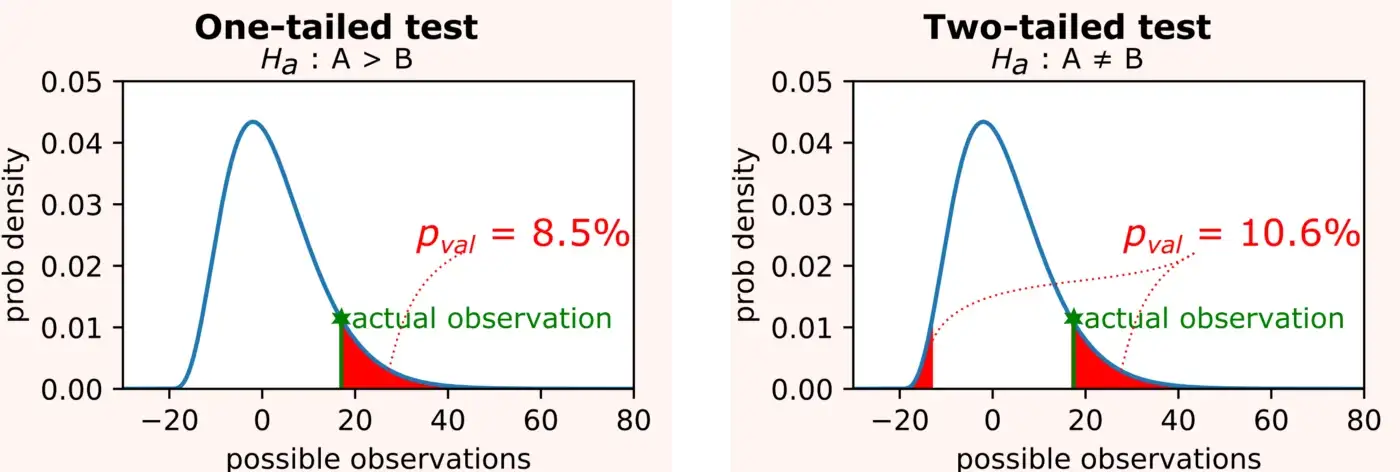

Таким образом, `p-value` вычисляется как площадь под двумя хвостами функции распределения плотности вероятности $p(x)$ выбранной тестовой статистики для всех $x’$ таких что $p(x’) ≤ p(\text{actual observation})$.

## 1. Дискретные метрики
Давайте рассмотрим первые дискретные метрики, например, кликабельность. Мы случайным образом показываем посетителям один из двух возможных дизайнов рекламы, и на основе того, сколько из них кликают на него, мы должны определить, существенно ли полученные данные противоречат гипотезе об одинаковой эффективности двух дизайнов.

Допустим, что из мы собрали следующую информацию.

- x = 15 посетителей увидели рекламу А, 7 из них кликнули по ней.
- y = 19 посетителей увидели рекламу B, 15 из них кликнули по ней.

||A|B|**Total**|
|--|--|--|--|
|Click|7|15|**22**|
|No click|8|4|**12**|
|**Total**|**15**|**19**||

На первый взгляд кажется, что вариант B был более эффективным, но насколько статистически значима эта разница?

В большинстве статистических вычисли­тельных систем имеется процедура для фактического перечисления всех возмож­ ныхперестановок, которые могут произойти, сводит в таблицу их частоты и точно определяет, насколько предельным является наблюдаемый результат. Эта процеду­ра называется точным тестом Фишера. 

Используя показанную выше таблицу $2 \times 2$, мы можем использовать точный критерий Фишера для вычисления экпериментального `p-value` и проверки нашей гипотезы. Чтобы понять, как работает этот тест, начнем с того, что если мы зафиксируем поля таблиц (то есть четыре суммы каждой строки и столбца), то возможны лишь несколько различных результатов.

Теперь ключевое наблюдение состоит в том, что при нулевой гипотезе $H_0$ о том, что A и B имеют одинаковую эффективность, вероятность наблюдения любого из этих возможных результатов определяется гипергеометрическим распределением.

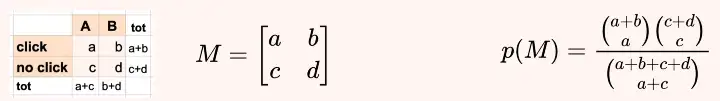

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.stats import chi2_contingency, mannwhitneyu, norm, t, ttest_ind

In [ ]:
np.random.seed(42)

x = np.random.binomial(n=1, p=0.6, size=15)
y = np.random.binomial(n=1, p=0.4, size=19)

_, (a, c) = np.unique(x, return_counts=True)
_, (b, d) = np.unique(y, return_counts=True)

df = pd.DataFrame(data=[[a, b], [c, d]], 
                 index=["click", "no click"], 
                 columns=["A", "B"])
m = df.values

print("- Observations:")
print(f"  - Version A: = {x}")
print(f"  - Version B: = {y}")
print("")
print("- Contingency table:")
display(df)

- Observations:
  - Version A: = [1 0 0 1 1 1 1 0 0 0 1 0 0 1 1]
  - Version B: = [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1]

- Contingency table:


,A,B
click,7,15
no click,8,4


### 1.1 Fisher's exact test

<table style="text-align:center">

<tbody><tr>
<th></th>
<th>A</th>
<th>B</th>
<th>Total
</th></tr>
<tr>
<td align="right"><b>Click</b>
</td>
<td><i>k</i> = <b>7</b>
</td>
<td><i>K</i> − <i>k</i> = <b>15</b>
</td>
<td><i>K</i> = <b>22</b>
</td></tr>
<tr>
<td align="right"><b>No click</b>
</td>
<td><i>n</i> − <i>k</i> = <b>8</b>
</td>
<td><i>N + k − n − K</i> = <b>4</b>
</td>
<td><i>N − K</i> = <b>12</b>
</td></tr>
<tr>
<td align="right"><b>Total</b>
</td>
<td><i>n</i> = <b>15</b>
</td>
<td><i>N − n</i> = <b>19</b>
</td>
<td><i>N</i> = <b>34</b>
</td></tr></tbody></table>


In [ ]:
def hypergeom(k, K, n, N):
    """PMF of the hypergeometric distribution.
    binom(n, k) - binomial coefficient in factorial notation n!/k!*(n-k)!
    """
    return binom(K, k) * binom(N-K, n-k) / binom(N, n)


def fisher_prob(m):
    """Probability of a given observed contingency table according to Fisher's exact test."""
    ((a, b), (c, d)) = m
    k = a
    K = a + b
    n = a + c
    N = a + b + c + d
    return hypergeom(k, K, n, N)


def fisher_probs_histogram(m):
    """Computes prob mass function histogram accroding to Fisher's exact test.
    This distribution has support max(0, N + n - M) <= x <= min(N, n), or,
    in terms of the values in the input table, min(0, a - d) <= x <= a + min(b, c)
    `x` can be interpreted as the upper-left element of a 2x2 table,
    so the tables in the distribution have form:
    [  x           n - x     ]
    [N - x    M - (n + N) + x]
    """
    neg_val = -np.min(np.diag(m)) # (m[0,0], m[1,1])
    pos_val = np.min(np.diag(np.fliplr(m))) # (m[0,1], m[1,0])
    probs = np.zeros(np.abs(pos_val - neg_val)+1)
    for i, k in enumerate(range(neg_val, pos_val+1)):
        probs[i] = fisher_prob(m + np.array([[1, -1], [-1, 1]]) * k)
    return probs

In [ ]:
table = m
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
for x in range(max(0, N+n-M), min(N, n)+1):
    tbl = [[x, n-x],
           [N-x, M-(n+N)+x]]
    print(fisher_prob(tbl))

8.297559000385956e-07
4.729608630219995e-05
0.000936462508783559
0.00884436813851139
0.04548532185520144
0.13645596556560433
0.24764230787831892
0.2759442859215554
0.1881438313101514
0.07665119053376539
0.01768873627702278
0.0020675146297818837
9.188953910141705e-05


In [ ]:
from scipy.stats import hypergeom

table = m
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
hypergeom.pmf(np.arange(start, end+1), M, n, N) # fisher_prob(m)


array([8.29755900e-07, 4.72960863e-05, 9.36462509e-04, 8.84436814e-03,
       4.54853219e-02, 1.36455966e-01, 2.47642308e-01, 2.75944286e-01,
       1.88143831e-01, 7.66511905e-02, 1.76887363e-02, 2.06751463e-03,
       9.18895391e-05])

- Fisher's exact test: p-val = 7.5%


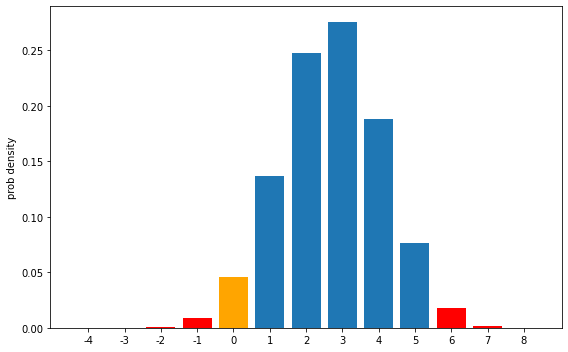

In [ ]:
bars_h = fisher_probs_histogram(m)

fig, ax = plt.subplots(figsize=(8, 5))
ii = np.arange(len(bars_h))
ax.bar(ii, bars_h)
idxs = bars_h <= fisher_prob(m)
ax.bar(ii[idxs], bars_h[idxs], color='r')
ax.set_ylabel("prob density")
p_val = bars_h[idxs].sum()
neg_val = -min(m[0,0], m[1,1])
pos_val = min(m[0,1], m[1,0])
ax.bar(ii[-neg_val], bars_h[-neg_val], color='orange')

ax.set_xticks(ii)
ax.set_xticklabels(np.arange(neg_val, pos_val+1))
fig.tight_layout()
print(f"- Fisher's exact test: p-val = {p_val:.1%}")

Используя эту формулу, мы получаем, что:

- вероятность увидеть наши реальные наблюдения составляет ~ 4,5%
- вероятность увидеть еще более маловероятные наблюдения в пользу B составляет ~ 1,0% (левый хвост);
- вероятность увидеть наблюдения еще более маловероятные наблюдения в пользу A составляет ~ 2,0% (правый хвост).

Имплементация теста Фишера в `scipy` https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html

In [ ]:
from scipy.stats import fisher_exact

_, p_val = fisher_exact(m, alternative='two-sided')
print(f"- Fisher's exact test: p-val = {p_val:.1%}")

- Fisher's exact test: p-val = 7.5%


## 1.2 Pearson's chi-squared test

Точный критерий Фишера имеет преимущество в вычислении точных `p-value`. Но если у нас большой размер выборки, это может быть неэффективным в вычислительном отношении. В этом случае мы можем использовать критерий $\chi^2$ Пирсона для вычисления приблизительного `p-value`.

Назовем $O_{ij}$ наблюдаемым значением таблицы в строке $i$ и столбце $j$. При нулевой гипотезе о независимости строк и столбцов, т. е. при условии, что A и B имеют одинаковую эффективность, мы можем легко вычислить соответствующие ожидаемые значения $E_{ij}$. Более того, если наблюдения распределены нормально, то статистика $\chi^2$ точно следует распределению Хи-квадрат с 1 степенью свободы.

\begin{equation}
\begin{aligned}
\chi^2 = \sum^2_{i=1}\sum^2_{j=1} \frac{(O_{ij} - E_{ij})^2}{E_{ij}} \sim \chi^2_1 \qquad\qquad
 E_{ij} = \frac{(O_{i1} + O_{i2})(O_{1j} + O_{2j})}{O_{11} + O_{12}+ O_{21}+O_{22}}
\end{aligned}
\end{equation}

На самом деле этот тест также можно использовать наблюдениями не из нормального распределения, если размер выборки достаточно велик.

В нашем примере, используя критерий хи-квадрат Пирсона, мы получаем χ2 ≈ 3.825, что дает p-value ≈ 5.1%.


In [ ]:
chi2_val, p_val, *_ = chi2_contingency(m, correction=False)

print("- Pearson's chi-squared t-test:")
print(f"   - χ2 value: {chi2_val:.3f}")
print(f"   - p-value: {p_val:.1%}")

- Pearson's chi-squared t-test:
   - χ2 value: 3.825
   - p-value: 5.1%


## 2. Непрерывные метрики

Давайте теперь рассмотрим случай непрерывной метрики, например, средний доход на пользователя. Мы случайным образом показываем посетителям нашего веб-сайта один из двух возможных макетов и, исходя из того, какой доход каждый пользователь принес за месяц, мы хотим определить, существенно ли наши данные противоречат гипотезе об одинаковой эффективности двух макетов веб-сайта.

Рассмотрим следующий случай.

- nX = 17 пользователей увидели макет А, а затем совершили следующие покупки: 200, 150, 250, 350, 150, 150, 350, 250, 150, 250, 150, 150, 200, 0, 0, 100, 50;
- nX = 14 пользователей увидели макет B, а затем совершили следующие покупки: 300, 150, 150, 400, 250, 250, 150, 200, 250, 150, 300, 200, 250, 200.

- Observations:
  - Version A: = [200 150 250 350 150 150 350 250 150 250 150 150 200   0   0 100  50]
  - Version B: = [300 150 150 400 250 250 150 200 250 150 300 200 250 200]

- Distribution plot:


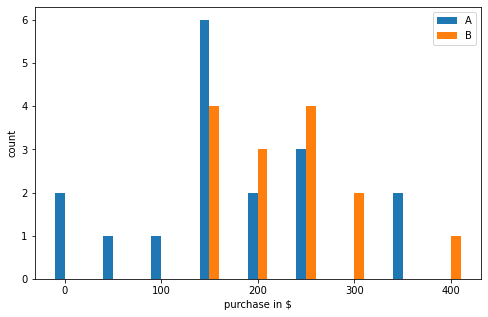

In [ ]:
np.random.seed(42)

n_x, n_y = 17, 14

d1 = norm(loc=200, scale=100)
d2 = norm(loc=280, scale=90)

disc = 50
x = (d1.rvs(size=n_x) / disc).astype(int) * disc
y = (d2.rvs(size=n_y) / disc).astype(int) * disc


print("- Observations:")
print(f"  - Version A: = {x}")
print(f"  - Version B: = {y}")
print("")
print(f"- Distribution plot:")
f, ax = plt.subplots(figsize=(8, 5))
for i, (xi, li) in enumerate(zip([x, y], ["A", "B"])):
    v, c = np.unique(xi, return_counts=True)
    ax.bar(v-5+10*i, c, width=10, label=li)

ax.set_xlabel("purchase in $")
ax.set_ylabel("count")
ax.legend();

Опять же, на первый взгляд кажется, что версия B была более эффективной. Но насколько статистически значимо это предположение?

In [ ]:
def plot_pval(distribution, t_val, xlims=(-5, 5), ylims=(0, 0.5)):
    xx = np.linspace(*xlims, 1000)
    f, ax = plt.subplots(figsize=(8, 5))
    ax.plot(xx, distribution.pdf(xx))
    ax.set_ylim(ylims)
    ax.vlines(t_val, 0, stat_distrib.pdf(t_val), color='orange')
    ax.plot(t_val, stat_distrib.pdf(t_val), 'o', color='orange')
    xp = xx <= t_val
    ax.fill_between(xx[xp], xx[xp] * 0, stat_distrib.pdf(xx[xp]), color='r')
    xp = xx >= -t_val
    ax.fill_between(xx[xp], xx[xp] * 0, stat_distrib.pdf(xx[xp]), color='r')
    ax.set_ylabel("prob denisty")
    f.tight_layout()
    return f, ax

### 2.1 Z-test

Z-тест можно применять при следующих предположениях.

1. Наблюдения нормально распределены (или размер выборки большой).
2. Распределения выборки имеет известную дисперсию σ.

Согласно приведенным выше предположениям, Z-тест использует тот факт, что статистика имеет стандартное нормальное распределение.

$$Z = \frac{\hat{X} - \hat{Y}}{\sqrt{\frac{\sigma^2_x}{n_x} + \frac{\sigma^2_y}{n_y}}} \sim N(0,1)$$

В большинстве случаев стандартные отклонения неизвестны и должны быть оценены, поэтому t-критерий предпочтительнее, как мы увидим позже. В любом случае, если бы мы знали истинное значение σX=100 и σX=90, то получили бы z ≈ -1,697, что соответствует p-значению ≈ 9%.

- Z-test:
   - z value: -1.697
   - p-value: 9.0%


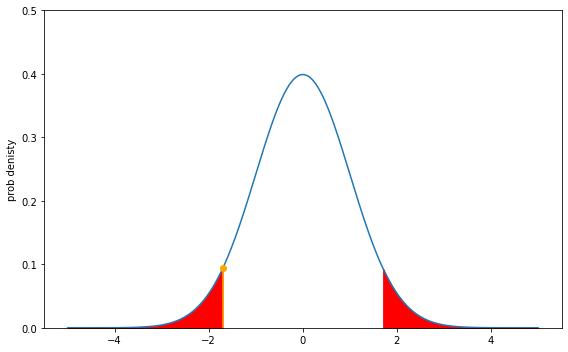

In [ ]:
# Known standard deviations
s_x = 100
s_y = 90

# Z value
z_val = (x.mean() - y.mean()) / np.sqrt(s_x**2/n_x + s_y**2/n_y)

# Test statistic distribution under null hypothesis H0
stat_distrib = norm(loc=0, scale=1)

# p-value
p_val = stat_distrib.cdf(z_val) * 2

print("- Z-test:")
print(f"   - z value: {z_val:.3f}")
print(f"   - p-value: {p_val:.1%}")
plot_pval(stat_distrib, z_val);

### 2.2 Student's t-test

В большинстве случаев дисперсии выборочных распределений неизвестны, поэтому нам необходимо их оценить. Затем можно применить t-критерий Стьюдента при следующих предположениях.

1. Наблюдения нормально распределены (или размер выборки большой).
2. Выборочные распределения имеют «похожие» дисперсии σX ≈ σY.

При приведенных выше предположениях t-критерий Стьюдента основан на наблюдении, что рассчитаная статистика имеет распределение Стьюдента.

\begin{equation}
\begin{aligned}
T = \frac{\bar{X} - \bar{Y}}{S_p \sqrt{\frac{1}{n_X} + \frac{1}{n_Y}}} \sim t_v \qquad\qquad
 v = n_X + n_Y - 2
\end{aligned}
\end{equation}

Здесь $S_p$ представляет собой общее стандартное отклонение, полученное из выборочных дисперсий $S_X$ и $S_Y$, которые вычисляются с использованием несмещенной формулы с поправкой Бесселя.

В нашем примере, используя критерий Стьюдента, мы получаем t ≈ -1.789 и ν = 29, что дает значение p_value ≈ 8.4%.

- Student's t-test:
   - v: 29.000
   - t: -1.789
   - p-value: 8.4%


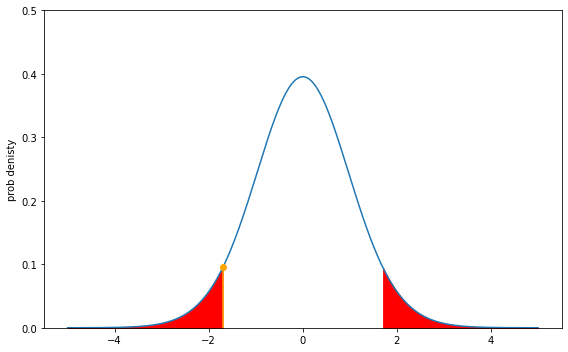

In [ ]:
# Sample variances (w. Bessel correction)
s_x = np.sqrt(np.var(x, ddof=1))
s_y = np.sqrt(np.var(y, ddof=1))

# Pooled variance
s_p = np.sqrt(((n_x-1) * s_x**2 + (n_y-1) * s_y**2) / (n_x + n_y - 2))

# Test statistic distribution under null hypothesis H0
dofs = n_x + n_y - 2
stat_distrib = t(df=dofs, loc=0, scale=1)

# t value
t_val = (x.mean() - y.mean()) / (s_p * np.sqrt(1/n_x + 1/n_y))

# p-value
p_val = stat_distrib.cdf(t_val) * 2

print("- Student's t-test:")
print(f"   - v: {dofs:.3f}")
print(f"   - t: {t_val:.3f}")
print(f"   - p-value: {p_val:.1%}")
plot_pval(stat_distrib, z_val);

### 2.3 Welch's t-test

В большинстве случаев t-критерий Стьюдента можно эффективно применять с хорошими результатами. Однако в редких случаях может случиться так, что его второе допущение (аналогичная дисперсия выборочных распределений) будет нарушено. В этом случае мы не можем вычислить объединенную дисперсию, и вместо критерия Стьюдента мы должны использовать критерий Уэлча.

Этот тест работает при тех же предположениях, что и критерий Стьюдента, но снимает требование о подобных дисперсиях. Затем мы можем использовать немного другую статистику $t$, которая также имеет распределение Стьюдента, но с другим числом степеней свободы $ν$.

Комплексная формула для ν следует из [уравнения Уэлча–Саттертуэйта](https://en.wikipedia.org/wiki/Welch%E2%80%93Satterthwaite_equation).

\begin{equation}
\begin{aligned}
T = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{S^2_Y}{n_X} + \frac{S^2_Y}{n_Y}}} \sim t_v \qquad\qquad
 v = \frac{(\frac{S^2_Y}{n_X} + \frac{S^2_Y}{n_Y})^2}{\frac{(\frac{S^2_X}{n_X})^2}{n_X-1} + {\frac{(\frac{S^2_Y}{n_Y})^2}{n_Y-1}}}
\end{aligned}
\end{equation}

В нашем примере, используя t-критерий Уэлча, мы получаем t ≈ -1,848 и ν ≈ 28,51, что дает p-значение ≈ 7,5%

- Welch' t-test:
   - v: 28.505
   - t: -1.848
   - p-value: 7.5%


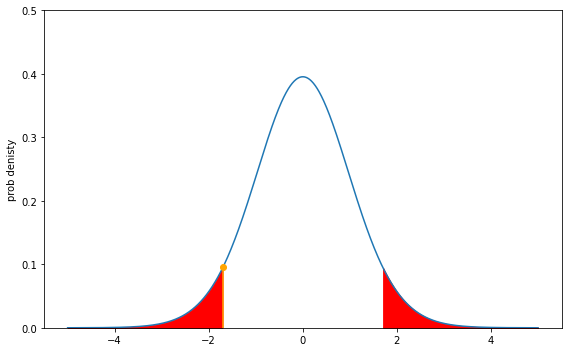

In [ ]:
# Sample variances (w. Bessel correction)
s_x = np.sqrt(np.var(x, ddof=1))
s_y = np.sqrt(np.var(y, ddof=1))

# Denominator (not a pooled variance!)
s_d = np.sqrt(s_x**2/n_x + s_y**2/n_y)
    
    
# Test statistic distribution under null hypothesis H0
dofs = s_d**4 / ((s_x**2/n_x)**2/(n_x-1) + (s_y**2/n_y)**2/(n_y-1))

stat_distrib = t(df=dofs, loc=0, scale=1)

# t value
t_val = (x.mean() - y.mean()) / s_d

# p-value
p_val = stat_distrib.cdf(t_val) * 2

print("- Welch' t-test:")
print(f"   - v: {dofs:.3f}")
print(f"   - t: {t_val:.3f}")
print(f"   - p-value: {p_val:.1%}")
plot_pval(stat_distrib, z_val);

## 3. Непрерывные метрики без нормального распределения

Ранее о непрерывных метриках мы предполагали, что наши наблюдения получены из нормальных распределений. Но ненормальные распределения чрезвычайно распространены, когда речь идет о ежемесячных доходах на пользователя и т. д. Есть несколько ситуаций, при которых часто нарушается нормальность:

- пик в нуле — большинство пользователей вообще ничего не покупают, поэтому много нулевых наблюдений;
- мультимодальное распределение – часть пользователей ориентируется преимущественно на дешевые товары, а другая на более дорогие.

Однако, если у нас есть достаточно данных, тесты, полученные при предположениях о нормальности, таких как Z-критерий, t-критерий Стьюдента и t-критерий Уэлча, все еще могут применяться для наблюдений, которые значительно отклоняются от нормальности. Благодаря центральной предельной теореме распределение тестовой статистики стремится к нормальному по мере увеличения размера выборки. В рассматриваемом нами мультимодальном примере с нулевым завышением даже размер выборки 40 дает распределение, которое хорошо аппроксимируется нормальным распределением.

Но если размер выборки все еще слишком мал, чтобы предположить нормальность, у нас нет другого выбора, кроме как использовать непараметрический подход, такой как U-критерий Манна-Уитни.

### 3.1 Mann-Whitney U test

Этот тест не делает никаких предположений о характере распределений исследуемых выборок, поэтому он полностью непараметрический. Идея теста Манна-Уитни состоит в том, чтобы вычислить следующую [статистику U](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test).

\begin{equation}
\begin{aligned}
U = \sum^{n_X}_{i=1}\sum^{n_Y}_{j=1} D(X_i, Y_j) \qquad\qquad
D(X_i, Y_j) = \left\{
    \begin{array}{ll}
        0, & X < Y \\
        1, & X > Y \\
        1/2, & X = Y
    \end{array}
\right.
\end{aligned}
\end{equation}

Значения этого тестового критерия сведены в таблицу, поскольку распределение может быть вычислено при нулевой гипотезе о том, что для случайных выборок X и Y из двух совокупностей вероятность $P(X < Y)$ такая же, как $P(X > Y)$.

В нашем примере, используя критерий Манна-Уитни U, мы получаем U = 76, что дает значение p_value ≈ 8,0%.

In [ ]:
mwu = mannwhitneyu(x, y, use_continuity=False, alternative="two-sided")

print("- Mann-Whitney U test:")
print(f"   - U value: {mwu.statistic:.3f}")
print(f"   - p-value: {mwu.pvalue:.1%}")

- Mann-Whitney U test:
   - U value: 76.000
   - p-value: 8.0%


## Data distribution VS Stats distribution

Тесты, основанные на допущении нормально распределенной тестового критерия, также могут применяться, если исходное распределение выборки сильно отличается от нормального. Благодаря центральной предельной теореме распределение тестовой статистики становится асимптотически нормальным при увеличении размера выборки. Это очень полезно в случае A/B-тестов, которые получают наблюдения с нулевым пиком и/или мультимодальные.

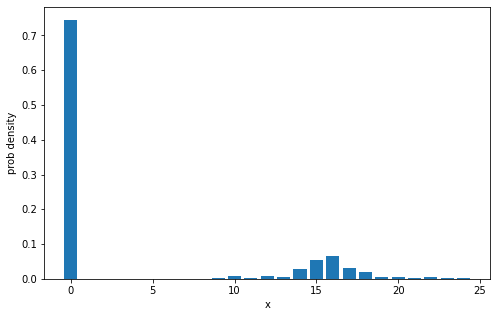

In [ ]:
p = np.array([245, 0, 0, 0, 0, 0, 0, 0, 0,  1, 3, 1, 3, 2, 9, 18, 22, 10, 6, 2, 2, 1, 2, 1, 1])
a = np.arange(len(p))
p = p / p.sum()

f, ax = plt.subplots(figsize=(8, 5))
ax.bar(a, p)
ax.set_ylabel("prob density")
ax.set_xlabel("x");

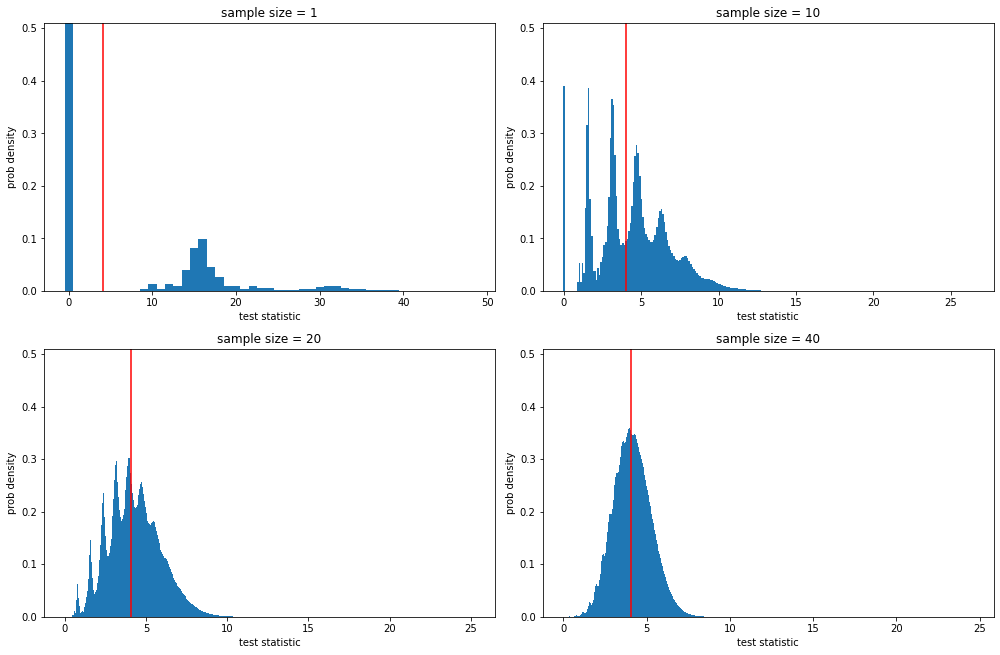

In [ ]:
loc = (p * np.arange(len(p))).sum()

nn = [1, 10, 20, 40]
f, axx = plt.subplots(2, 2, figsize=(3.5*4, 2.3*4))    

for i, n in enumerate(nn):
    r, c = divmod(i, 2)        
    x = p
    ax = axx[r, c]
    for _ in range(n):
        x = np.convolve(x, p)

    ax.bar(np.arange(len(x))/n, x*n, width=1/n)
    ax.set_ylim([0, 0.51])
    ax.vlines(loc, 0, 0.51, 'r')
    ax.set_xlabel("test statistic")
    ax.set_ylabel("prob density")
    ax.set_title(f"sample size = {n}")

f.tight_layout()